In [0]:
from __future__ import print_function
%tensorflow_version 2.x
import tensorflow as tf  
import h5py, os, scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline 


# **Dataset MNIST**

Importiamo il dataset MNIST e riportiamo quante immagini verranno utilizzate per allenare la rete proposta e quante serviranno poi per fare testing.

In [20]:
(x_learn, y_learn), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Numero di immagini in x_learn', x_learn.shape[0])
print('Numero di immagini in x_test', x_test.shape[0])
x_learn.shape, x_test.shape #SCRIVERE MEGLIO!!!!!!!!111!!!!!!111!111!1

Numero di immagini in x_learn 60000
Numero di immagini in x_test 10000


((60000, 28, 28), (10000, 28, 28))

Mostriamo adesso le prime 16 immagini che compongono il nostro dataset.


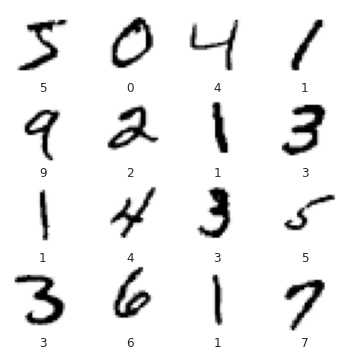

In [21]:
plt.figure(figsize=(6,6))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_learn[i], cmap='Greys') 
    plt.xlabel(y_learn[i])
plt.show()

Mostriamo adesso, invece, in quanti modi all'interno del dataset è stato scritto il numero 5. 

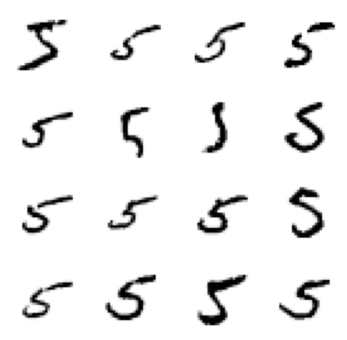

In [22]:
selected_number = 5

plt.figure(figsize=(6,6))

x_learn_selected = x_learn[y_learn == selected_number]

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_learn_selected[i], cmap='Greys')
plt.show()

# **Breve fase di preprocessing con i dati**



In [23]:
# Attuo un reshaping dell'array in 4-dims per poter lavorare con le API di Keras
x_learn = x_learn.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Definisco la dimensione di una singola immagine
input_shape = (28, 28, 1) 

# Controllo che i miei valori siano float
x_learn = x_learn.astype('float32')
x_test = x_test.astype('float32')

# Normalizzo i codici RBG
x_learn /= 255
x_test /= 255

# Stampo le dimensioni di x_learn e x_test
print('x_learn shape:', x_learn.shape, '\nx_test shape:', x_test.shape)


x_learn shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)


Mi occupo adesso di estrarre da x_learn da una parte il **training set** e dall'altra il **validation set**.

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size = 0.3) 

print('Numero di immagini in x_train', x_train.shape[0])
print('Numero di immagini in x_val', x_val.shape[0])

Numero di immagini in x_train 42000
Numero di immagini in x_val 18000


Viene definito il **modello** che si utilizzerà nella rete. 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [0]:
# Creo un modello sequenziale e aggiungo i vari layers
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening degli array 2D per i layers fully connected 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# **Fase di Training**
Si compila il modello e si inizia la fase di apprendimento.

In [27]:
epochs = 7

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = epochs)

Train on 42000 samples, validate on 18000 samples
Epoch 1/7
42000/42000 [==============================] - 7s 164us/step - loss: 0.2467 - accuracy: 0.9262 - val_loss: 0.1237 - val_accuracy: 0.9631
Epoch 2/7
42000/42000 [==============================] - 7s 162us/step - loss: 0.1040 - accuracy: 0.9684 - val_loss: 0.0790 - val_accuracy: 0.9756
Epoch 3/7
42000/42000 [==============================] - 7s 161us/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.0701 - val_accuracy: 0.9797
Epoch 4/7
42000/42000 [==============================] - 7s 162us/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 5/7
42000/42000 [==============================] - 7s 161us/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0660 - val_accuracy: 0.9816
Epoch 6/7
42000/42000 [==============================] - 7s 162us/step - loss: 0.0331 - accuracy: 0.9888 - val_loss: 0.0650 - val_accuracy: 0.9818
Epoch 7/7
42000/42000 [==============================] - 7s 162us/st

# **Risultati dell'apprendimento**

Si misurano i valori di **accuracy** e di **loss** all'interno della mia rete. 


In [0]:
def plot_history(history): #specificare che parte già da un valore alto !!!!!!!!!!!

    # Plotto i valori relativi alla accuracy in fase di training e validation
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plotto i valori relativi alla loss in fase di training e validation
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

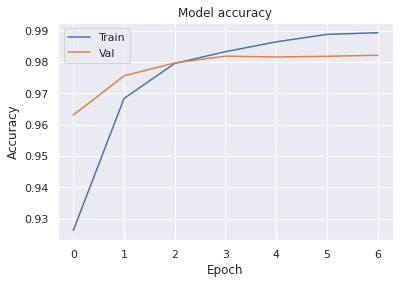

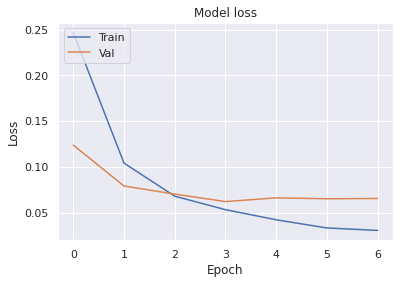

In [29]:
plot_history(history)

Si valuta adesso la rete ottenuta con il dataset di testing, verificandone i risultati

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

10000/10000 [==============================] - 1s 75us/step
Test accuracy: 0.983, Test loss: 0.056


# **Heatmap**

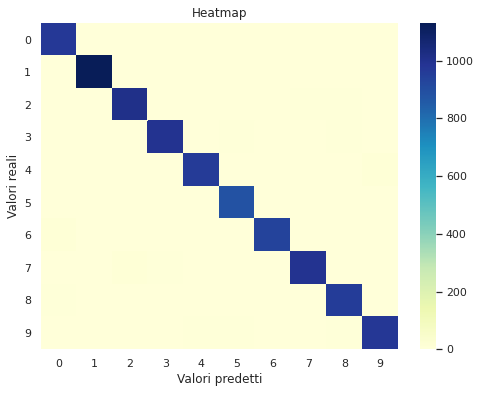

In [31]:
predictions = model.predict(x_test)

# y_pred sarà l'indice della classe con valore (% di appartenenza) più grande
y_pred = np.argmax(predictions, axis=1) 

# Creo la matrice di confusione 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.set()

ax = sns.heatmap(cm, cmap="YlGnBu")
ax.set(title="Heatmap", xlabel="Valori predetti", ylabel="Valori reali")
num = map(str, range(10))
dummy = ax.set_yticklabels(num, rotation = 0)

Nel complesso si ottengono ottimi risultati, ma non sempre. In seguito vediamo alcune immagini associate alla label scorretta. 

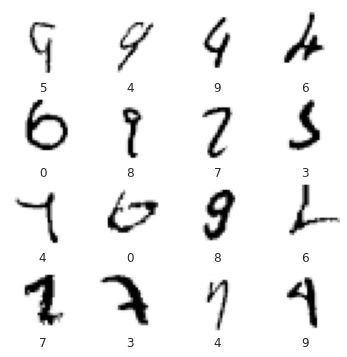

In [32]:
plt.figure(figsize=(6,6))
j = 0

for i in range(10000):
    if(np.argmax(predictions[i]) != y_test[i]):
        plt.subplot(4,4,j+1)
        plt.xticks([])
        plt.yticks([])

        # Per visualizzare l'immagine attuo un reshaping
        plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
        
        plt.xlabel(np.argmax(predictions[i]))
        j+=1
        if (j%16 == 0):
            break
plt.show()

In [33]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_directory = "/gdrive/My Drive/Visualizzazione_Scientifica/Dataset/train"
test_directory = "/gdrive/My Drive/Visualizzazione_Scientifica/Dataset/test"

target_size = (200,300) #200 altezza 300 larghezza
batch_size = 19

classes = ['Aereoplano','Faccia','Leopardo','Motocicletta','Orologio']

num_classes = len(classes)
num_epochs = 5

In [35]:
train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)


train_generator = train_datagen.flow_from_directory(
  train_directory,
  target_size = target_size,
  batch_size = batch_size,
  classes = classes,
  class_mode = "categorical"
)


test_generator = test_datagen.flow_from_directory(
  test_directory,
  target_size = target_size,
  batch_size = batch_size,
  classes = classes,
  class_mode = "categorical",
  shuffle = False
)

total_sample = train_generator.n
input_shape = tuple(list(target_size) + [3])
input_shape


Found 1976 images belonging to 5 classes.
Found 494 images belonging to 5 classes.


(200, 300, 3)

In [36]:
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=input_shape),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 149, 16)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 71, 64)       

In [37]:
# Optimizer and compilation
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "RMSprop",
    metrics = ["acc"]
)

# Training
model.fit(
    train_generator,
    steps_per_epoch=int(total_sample / batch_size),
    epochs=num_epochs,
    verbose=1,
)

Epoch 1/5
104/104 [==============================] - 1160s 11s/step - loss: 1.1157 - acc: 0.6058
Epoch 2/5
104/104 [==============================] - 8s 81ms/step - loss: 0.4097 - acc: 0.8689
Epoch 3/5
104/104 [==============================] - 8s 80ms/step - loss: 0.2755 - acc: 0.9124
Epoch 4/5
104/104 [==============================] - 8s 81ms/step - loss: 0.2471 - acc: 0.9307
Epoch 5/5
104/104 [==============================] - 8s 81ms/step - loss: 0.1617 - acc: 0.9514


In [0]:
model.save('/gdrive/My Drive/Visualizzazione_Scientifica/model.h5')

In [38]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

26/26 [==============================] - 293s 11s/step
Test accuracy: 0.862, Test loss: 0.818


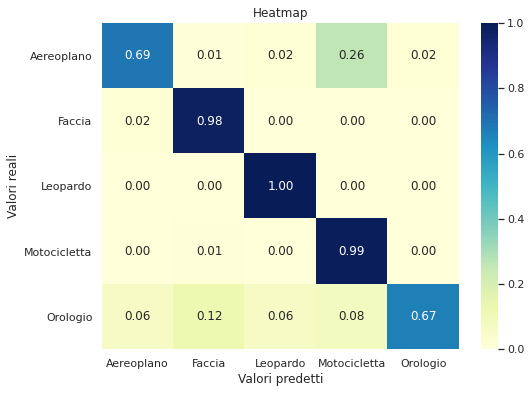

In [44]:
true_labels = test_generator.classes
test_generator.reset()
predictions = model.predict(test_generator)

# y_pred sarà l'indice della classe con valore (% di appartenenza) più grande
y_pred = np.argmax(predictions, axis=1) 

# Creo la matrice di confusione 
cm2 = confusion_matrix(true_labels, y_pred, normalize = 'true')

plt.figure(figsize=(8,6))

ax = sns.heatmap(cm2, cmap="YlGnBu", annot = True, fmt='.2f', xticklabels = classes, yticklabels = classes)

ax.set(title="Heatmap", xlabel="Valori predetti", ylabel="Valori reali")
dummy = ax.set_yticklabels(classes, rotation = 0)

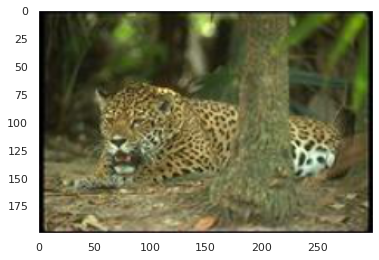

In [104]:
from keras.preprocessing.image import img_to_array, load_img
import cv2

img_path = '/gdrive/My Drive/Visualizzazione_Scientifica/Dataset/train/Leopardo/image_0091.jpg'

img = load_img(img_path)
img = img_to_array(img)
img = img / 255.0
img = cv2.resize(img, (300, 200))

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.grid(False)
plt.show()


In [105]:
x = np.expand_dims(img, axis=0)
pred = model.predict(x)

print("Immagine predetta: " + classes[np.argmax(pred)] + "\n")
np.set_printoptions(suppress=True) 
print(classes)
print(pred)

Immagine predetta: Leopardo

['Aereoplano', 'Faccia', 'Leopardo', 'Motocicletta', 'Orologio']
[[ 0.5473469  -1.5850973   4.326361   -1.2332215   0.07131393]]


In [42]:
!pip install keract
from keract import get_activations, display_activations

In [96]:
activations = get_activations(model, x)
display_activations(activations, save=False)

Output hidden; open in https://colab.research.google.com to view.

In [101]:
pip install keras-vis

In [0]:
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import matplotlib.cm as mcm

layer_index = utils.find_layer_idx(model, 'dense_6')
model.layers[layer_index].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)  

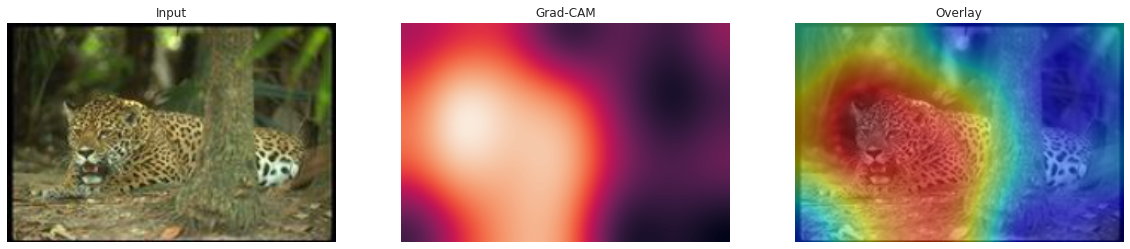

In [106]:
input_class = np.argmax(pred)

# Matplotlib preparations
fig, axes = plt.subplots(1, 3, figsize=(20,20))

# Generate visualization
visualization = visualize_cam(model, layer_index, filter_indices=input_class, seed_input=img)

axes[0].axis('off')
axes[0].imshow(img) 
axes[0].set_title('Input')

axes[1].axis('off')
axes[1].imshow(visualization)
axes[1].set_title('Grad-CAM')

heatmap = np.uint8(mcm.jet(visualization)[..., :3] * 255)
original = np.uint8(mcm.gray(img[..., 0])[..., :3] * 255)

axes[2].axis('off')
axes[2].imshow(overlay(heatmap, original))
axes[2].set_title('Overlay')
plt.show()